<a href="https://colab.research.google.com/github/anna01122002/CourseWork/blob/main/CourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import optuna
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist


4422102/4422102 [==============================] - 0s 0us/step
Форма train_images: (60000, 28, 28)
Количество изображений в обучающей выборке: 60000
Размер изображений: 28 x 28
Количество классов: 10


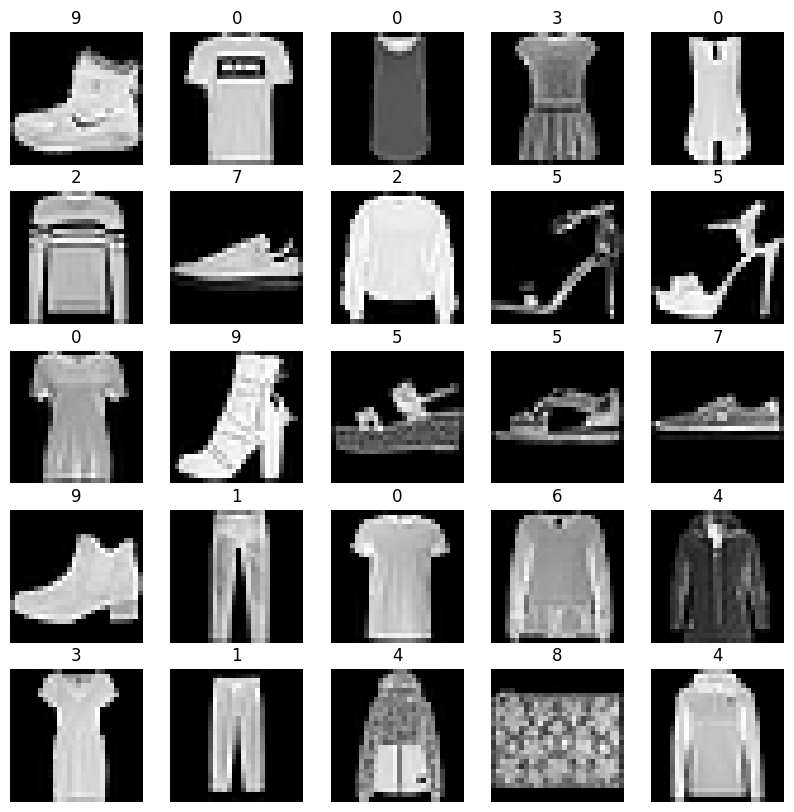

Размер обучающей выборки: 54000
Размер валидационной выборки: 6000
Размер тестовой выборки: 10000


In [ ]:
# Загрузка данных
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Вывод информации о форме и размере данных
print("Форма train_images:", train_images.shape)
print("Количество изображений в обучающей выборке:", train_images.shape[0])
print("Размер изображений:", train_images.shape[1], "x", train_images.shape[2])
print("Количество классов:", len(np.unique(train_labels)))

# Вывод нескольких изображений для иллюстрации
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

# Преобразование значений пикселей в диапазон [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Разделение на обучающую, валидационную и тестовую выборки
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42, stratify=train_labels)

print("Размер обучающей выборки:", train_images.shape[0])
print("Размер валидационной выборки:", val_images.shape[0])
print("Размер тестовой выборки:", test_images.shape[0])

In [ ]:
# Подготовка данных
train_dataset = TensorDataset(torch.Tensor(train_images), torch.LongTensor(train_labels))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(torch.Tensor(val_images), torch.LongTensor(val_labels))
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Определение архитектуры модели
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Создание экземпляра модели
model = NeuralNetwork()

# Определение функции ошибки и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
def train_one_epoch(model, train_loader, criterion, optimizer):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    train_one_epoch(model, train_loader, criterion, optimizer)
    val_accuracy = evaluate_model(model, val_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {val_accuracy:.4f}")

# Оценка качества на тестовых данных
test_dataset = TensorDataset(torch.Tensor(test_images), torch.LongTensor(test_labels))
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

test_accuracy = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch [1/10], Validation Accuracy: 0.8635
Epoch [2/10], Validation Accuracy: 0.8805
Epoch [3/10], Validation Accuracy: 0.8768
Epoch [4/10], Validation Accuracy: 0.8887
Epoch [5/10], Validation Accuracy: 0.8892
Epoch [6/10], Validation Accuracy: 0.8882
Epoch [7/10], Validation Accuracy: 0.9020
Epoch [8/10], Validation Accuracy: 0.8998
Epoch [9/10], Validation Accuracy: 0.8942
Epoch [10/10], Validation Accuracy: 0.8945


<ipython-input-5-cc2b7bb98f7e>:64: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  test_dataset = TensorDataset(torch.Tensor(test_images), torch.LongTensor(test_labels))


Test Accuracy: 0.8825


In [ ]:
# Простая полносвязная сеть
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Полносвязная нейронная сеть с дополнительными скрытыми слоями
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden_stack(x)
        logits = self.fc(x)
        return logits


# Простая рекуррентная нейронная сеть (RNN)
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=28, hidden_size=128, num_layers=2, batch_first=True)
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        out, _ = self.rnn(x)
        logits = self.fc(out[:, -1, :])
        return logits

# Создание экземпляров моделей
models = {
    "MLP": MLP(),
    "SimpleNN": SimpleNN(),
    "RNN": RNN()
}

# Определение функции ошибки и оптимизатора
criterion = nn.CrossEntropyLoss()

# Обучение и оценка для каждой архитектуры
for model_name, model in models.items():
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    print(f"Training {model_name}...")
    for epoch in range(5):
        train_one_epoch(model, train_loader, criterion, optimizer)
        val_accuracy = evaluate_model(model, val_loader)
        print(f"Epoch [{epoch+1}/5], Validation Accuracy: {val_accuracy:.4f}")

    test_accuracy = evaluate_model(model, test_loader)
    print(f"Test Accuracy for {model_name}: {test_accuracy:.4f}")
    print("\n")


Training MLP...
Epoch [1/5], Validation Accuracy: 0.8623
Epoch [2/5], Validation Accuracy: 0.8737
Epoch [3/5], Validation Accuracy: 0.8665
Epoch [4/5], Validation Accuracy: 0.8885
Epoch [5/5], Validation Accuracy: 0.8877
Test Accuracy for MLP: 0.8775


Training SimpleNN...
Epoch [1/5], Validation Accuracy: 0.8680
Epoch [2/5], Validation Accuracy: 0.8735
Epoch [3/5], Validation Accuracy: 0.8843
Epoch [4/5], Validation Accuracy: 0.8905
Epoch [5/5], Validation Accuracy: 0.8958
Test Accuracy for SimpleNN: 0.8824


Training RNN...
Epoch [1/5], Validation Accuracy: 0.7325
Epoch [2/5], Validation Accuracy: 0.7153
Epoch [3/5], Validation Accuracy: 0.7840
Epoch [4/5], Validation Accuracy: 0.8070
Epoch [5/5], Validation Accuracy: 0.8028
Test Accuracy for RNN: 0.7948




In [ ]:
# Определение архитектуры модели
class NeuralNetwork(nn.Module):
    def __init__(self, out_features1, out_features2, out_features3):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, out_features1),
            nn.ReLU(),
            nn.Linear(out_features1, out_features2),
            nn.ReLU(),
            nn.Linear(out_features2, out_features3),
            nn.ReLU(),
            nn.Linear(out_features3, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Создаем загрузчики данных
train_dataset = TensorDataset(torch.Tensor(train_images), torch.LongTensor(train_labels))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(torch.Tensor(val_images), torch.LongTensor(val_labels))
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Определение функции ошибки
criterion = nn.CrossEntropyLoss()

def objective(trial):
    out_features1 = trial.suggest_int('out_features1', 256, 1024)
    out_features2 = trial.suggest_int('out_features2', 256, 1024)
    out_features3 = trial.suggest_int('out_features3', 256, 1024)

    model = NeuralNetwork(out_features1, out_features2, out_features3)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(5):
        train_one_epoch(model, train_loader, criterion, optimizer)

    val_accuracy = evaluate_model(model, val_loader)
    return val_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

print("Best trial:")
trial = study.best_trial
print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")








[I 2023-08-05 07:17:22,618] A new study created in memory with name: no-name-139e950e-0e7b-4bdd-93ed-b919de719520
[I 2023-08-05 07:18:49,244] Trial 0 finished with value: 0.8791666666666667 and parameters: {'out_features1': 955, 'out_features2': 825, 'out_features3': 631}. Best is trial 0 with value: 0.8791666666666667.
[I 2023-08-05 07:19:33,847] Trial 1 finished with value: 0.8888333333333334 and parameters: {'out_features1': 551, 'out_features2': 720, 'out_features3': 375}. Best is trial 1 with value: 0.8888333333333334.
[I 2023-08-05 07:20:28,804] Trial 2 finished with value: 0.8918333333333334 and parameters: {'out_features1': 518, 'out_features2': 829, 'out_features3': 557}. Best is trial 2 with value: 0.8918333333333334.
[I 2023-08-05 07:21:48,780] Trial 3 finished with value: 0.8971666666666667 and parameters: {'out_features1': 793, 'out_features2': 993, 'out_features3': 590}. Best is trial 3 with value: 0.8971666666666667.
[I 2023-08-05 07:22:41,815] Trial 4 finished with valu

Best trial:
Value:  0.8971666666666667
Params: 
    out_features1: 793
    out_features2: 993
    out_features3: 590


Training MLP...
Epoch [1/5], Validation Accuracy: 0.8623
Epoch [2/5], Validation Accuracy: 0.8755
Epoch [3/5], Validation Accuracy: 0.8828
Epoch [4/5], Validation Accuracy: 0.8862
Epoch [5/5], Validation Accuracy: 0.8868
Test Accuracy for MLP: 0.8706




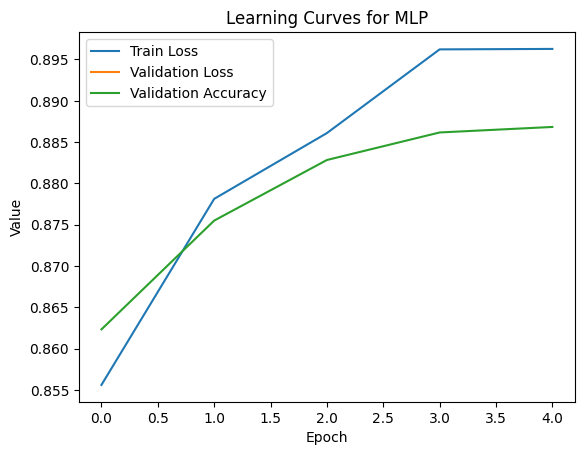

Training SimpleNN...
Epoch [1/5], Validation Accuracy: 0.8562
Epoch [2/5], Validation Accuracy: 0.8643
Epoch [3/5], Validation Accuracy: 0.8832
Epoch [4/5], Validation Accuracy: 0.8810
Epoch [5/5], Validation Accuracy: 0.8865
Test Accuracy for SimpleNN: 0.8772




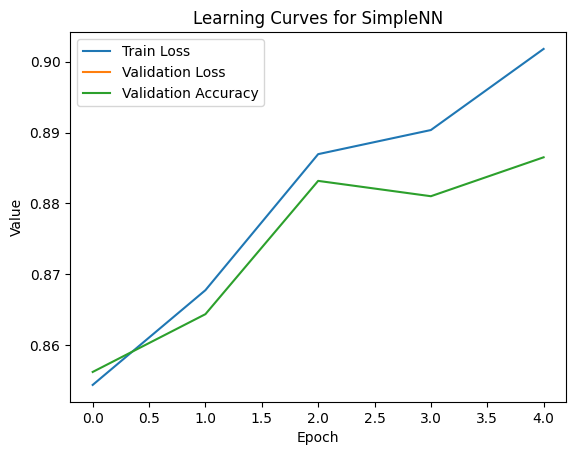

Training RNN...
Epoch [1/5], Validation Accuracy: 0.6673
Epoch [2/5], Validation Accuracy: 0.7747
Epoch [3/5], Validation Accuracy: 0.7408
Epoch [4/5], Validation Accuracy: 0.8045
Epoch [5/5], Validation Accuracy: 0.8073
Test Accuracy for RNN: 0.7918




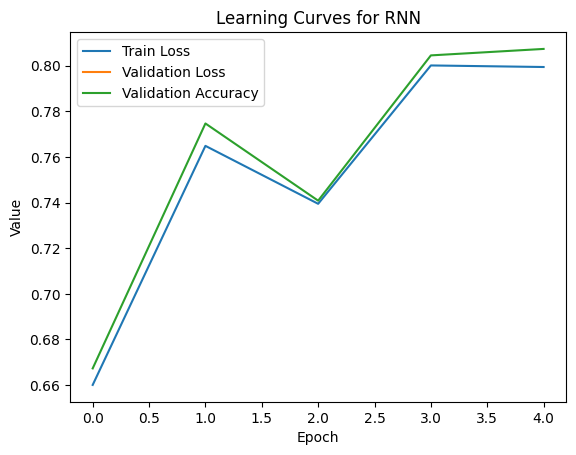

Training NeuralNetwork...
Epoch [1/5], Validation Accuracy: 0.8620
Epoch [2/5], Validation Accuracy: 0.8512
Epoch [3/5], Validation Accuracy: 0.8748
Epoch [4/5], Validation Accuracy: 0.8850
Epoch [5/5], Validation Accuracy: 0.8917
Test Accuracy for NeuralNetwork: 0.8759




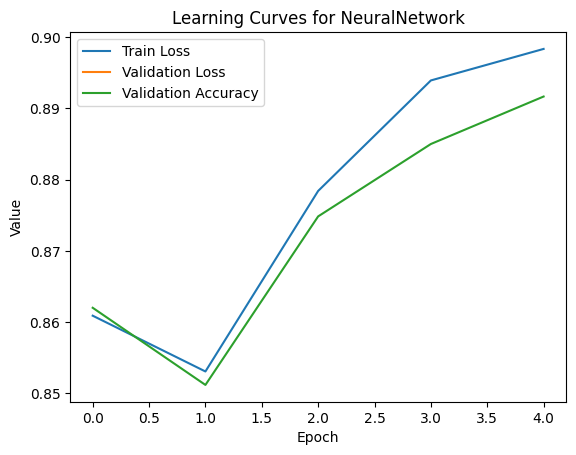

In [ ]:
# Создание экземпляров моделей
models = {
    "MLP": MLP(),
    "SimpleNN": SimpleNN(),
    "RNN": RNN(),
    "NeuralNetwork": NeuralNetwork(793, 993, 590)
}


def plot_learning_curves(history, title):
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Обучение и оценка для каждой архитектуры
for model_name, model in models.items():
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    history = {'train_loss': [], 'val_loss': [], 'val_accuracy': []}

    print(f"Training {model_name}...")
    for epoch in range(5):
        train_one_epoch(model, train_loader, criterion, optimizer)
        train_loss = evaluate_model(model, train_loader)
        val_accuracy = evaluate_model(model, val_loader)

        history['train_loss'].append(train_loss)
        history['val_accuracy'].append(val_accuracy)
        print(f"Epoch [{epoch+1}/5], Validation Accuracy: {val_accuracy:.4f}")

    test_accuracy = evaluate_model(model, test_loader)
    print(f"Test Accuracy for {model_name}: {test_accuracy:.4f}")
    print("\n")

    plot_learning_curves(history, f"Learning Curves for {model_name}")
